In [2]:
using QuantumOptics
using PyPlot

In [3]:
N = 4;
b = NLevelBasis(N)
σ21 = transition(b,2,1)
σ31 = transition(b,3,1)
σ41 = transition(b,4,1)
proj1 = transition(b,1,1)
proj2 = transition(b,2,2)
proj3 = transition(b,3,3)
proj4 = transition(b,4,4)

SparseOperator(dim=4x4)
  basis: NLevel(N=4)
  [4, 4]  =  1.0+0.0im

In [6]:
xmin = -10
xmax = 10
Npts = 100
b_x = PositionBasis(xmin,xmax,Npts)
x = position(b_x)
xpts = samplepoints(b_x)
p = momentum(b_x);

In [9]:
m = 1;
ω = 1
Hsho = p^2/(2m)+(1/2)*m*ω^2*x^2;

$\newcommand{\ket}[1]{\left|#1\right>}$
$\newcommand{\proj}[1]{\left|#1\right>\left<#1\right|}$
$\newcommand{\bra}[1]{\left<#1\right|}$
$\newcommand{\projoff}[2]{\left|#1\right>\left<#2\right|}$
\begin{equation}
    \hat{H} = \Delta\left(\proj{e,-1}+\proj{e,0}+\proj{e,-1}\right) + \Omega_{21}(\sigma_{21}+\sigma_{21}^{\dagger})+ \Omega_{31}(\sigma_{31}+\sigma_{31}^{\dagger})+ \Omega_{41}(\sigma_{41}+\sigma_{41}^{\dagger})
\end{equation}
where $\sigma_{i1} = \projoff{e,i}{g,0}$.

In [11]:
Δ = 0.1
Ω21 = 0.5;
Ω31 = 1;
Ω41 = 0.5;
B = diagonaloperator(b,[0,-1,0,1])
Hspin = Δ*(proj2+proj3+proj4)+B+Ω21*(σ21+dagger(σ21))+Ω31*(σ31+dagger(σ31))+Ω41*(σ41+dagger(σ41));
H = one(b_x)⊗ Hspin + Hsho ⊗ one(b);

In [36]:
ψ0spin = basisstate(b,1)
x0 = 0
p0 = 1
σ = 0.5
ψ0sho = gaussianstate(b_x,x0,p0,σ);
Ψ0 = ψ0sho⊗ ψ0spin;

In [37]:
tspan = 0:0.05:5
tout, Ψt = timeevolution.schroedinger(tspan,Ψ0,H);

In [38]:
exp_1 = real(expect(proj1,ψt));
exp_2 = real(expect(proj2,ψt))
exp_3 = real(expect(proj3,ψt))
exp_4 = real(expect(proj4,ψt))
plot(tout,exp_1)
plot(tout,exp_2)
plot(tout,exp_3)
plot(tout,exp_4)
legend(["g0","em1","e0","ep1"])

UndefVarError: UndefVarError: ψt not defined

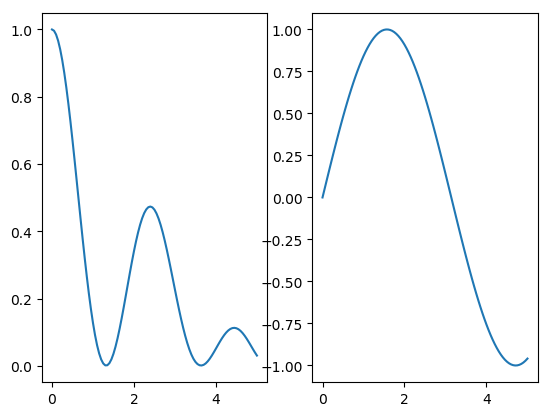

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000025BF4E0>

In [39]:
exp_1 = real(expect(one(b_x)⊗proj1,Ψt));
exp_x = real(expect(x⊗one(b),Ψt))
subplot(1,2,1)
plot(tout,exp_1)
subplot(1,2,2)
plot(tout,exp_x)